### Data Analysis
Nesta etapa, os dados estão processados e prontos para o processo de análise. Neste, objetivamos responder algumas questões, como:

- Top 10 gêneros favoritos (utilizando user_score como parâmetro);
- Lançamentos para cada plataforma;
- Top 10 desenvolvedoras com mais jogos lançados.

In [111]:
import pandas as pd
import numpy as np
import missingno as ms

In [16]:
df = pd.read_csv('datasets/cleaned_metacritic.csv', sep=';')
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [17]:
df.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,"Jun 19, 2011",84,1,0,283,20,5,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,NaN,T,"Nov 21, 2011",27,0,0,240,34,27,91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,"Nov 13, 2011",81,1,0,251,39,11,90,84


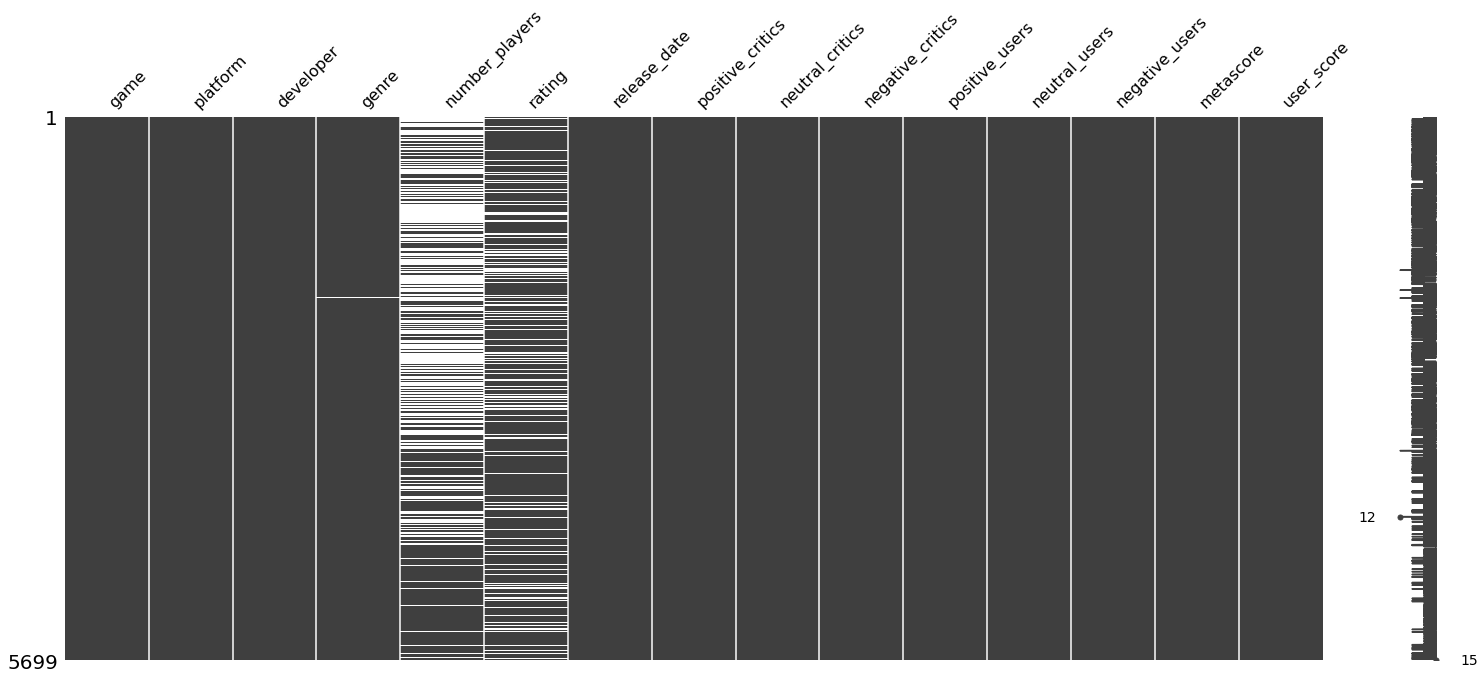

In [112]:
ms.matrix(df)

In [105]:
genresScore = list()
for genre in df['genre'].unique():
    genresScore.append(df[df['genre'] == genre]['user_score'].mean())

In [106]:
favorite_genres = pd.DataFrame({'Genre': df['genre'].unique(), 'User Score': genresScore})
favorite_genres.sort_values(by='User Score', ascending=False, inplace=True)
favorite_genres.drop(favorite_genres.index[1], inplace=True)
favorite_genres = favorite_genres.iloc[:10]

In [107]:
df[df['genre'] == '3D']

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
1008,Deadpool,PC,High Moon Studios,3D,No Online Multiplayer,M,"Jun 24, 2013",0,15,0,78,35,10,63,76
5288,Rad Rodgers,XONE,Slipgate Studios LLC,3D,No Online Multiplayer,M,"Feb 21, 2018",4,3,1,1,2,0,67,78


In [108]:
total = [x for x in df['platform'].value_counts()]
gamesPerPlatform = pd.DataFrame({'platform': df['platform'].value_counts().index, 'total': total})
gamesPerPlatform.head(10)

,platform,total
0,PC,2138
1,PS4,1429
2,XONE,784
3,Switch,526
4,3DS,383
5,VITA,254
6,WIIU,185


In [109]:
favorite_genres.to_csv('datasets/favorite_genres.csv', sep=';')

In [110]:
gamesPerPlatform.to_csv('datasets/games_per_platform.csv', sep=';')